# KernelSVM Classification

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
Train_df = pd.read_csv(r'H:\ML\Project\Spaceship Titanic\train.csv')
Test_df = pd.read_csv(r'H:\ML\Project\Spaceship Titanic\test.csv')

Train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Data Exploration

<Axes: >

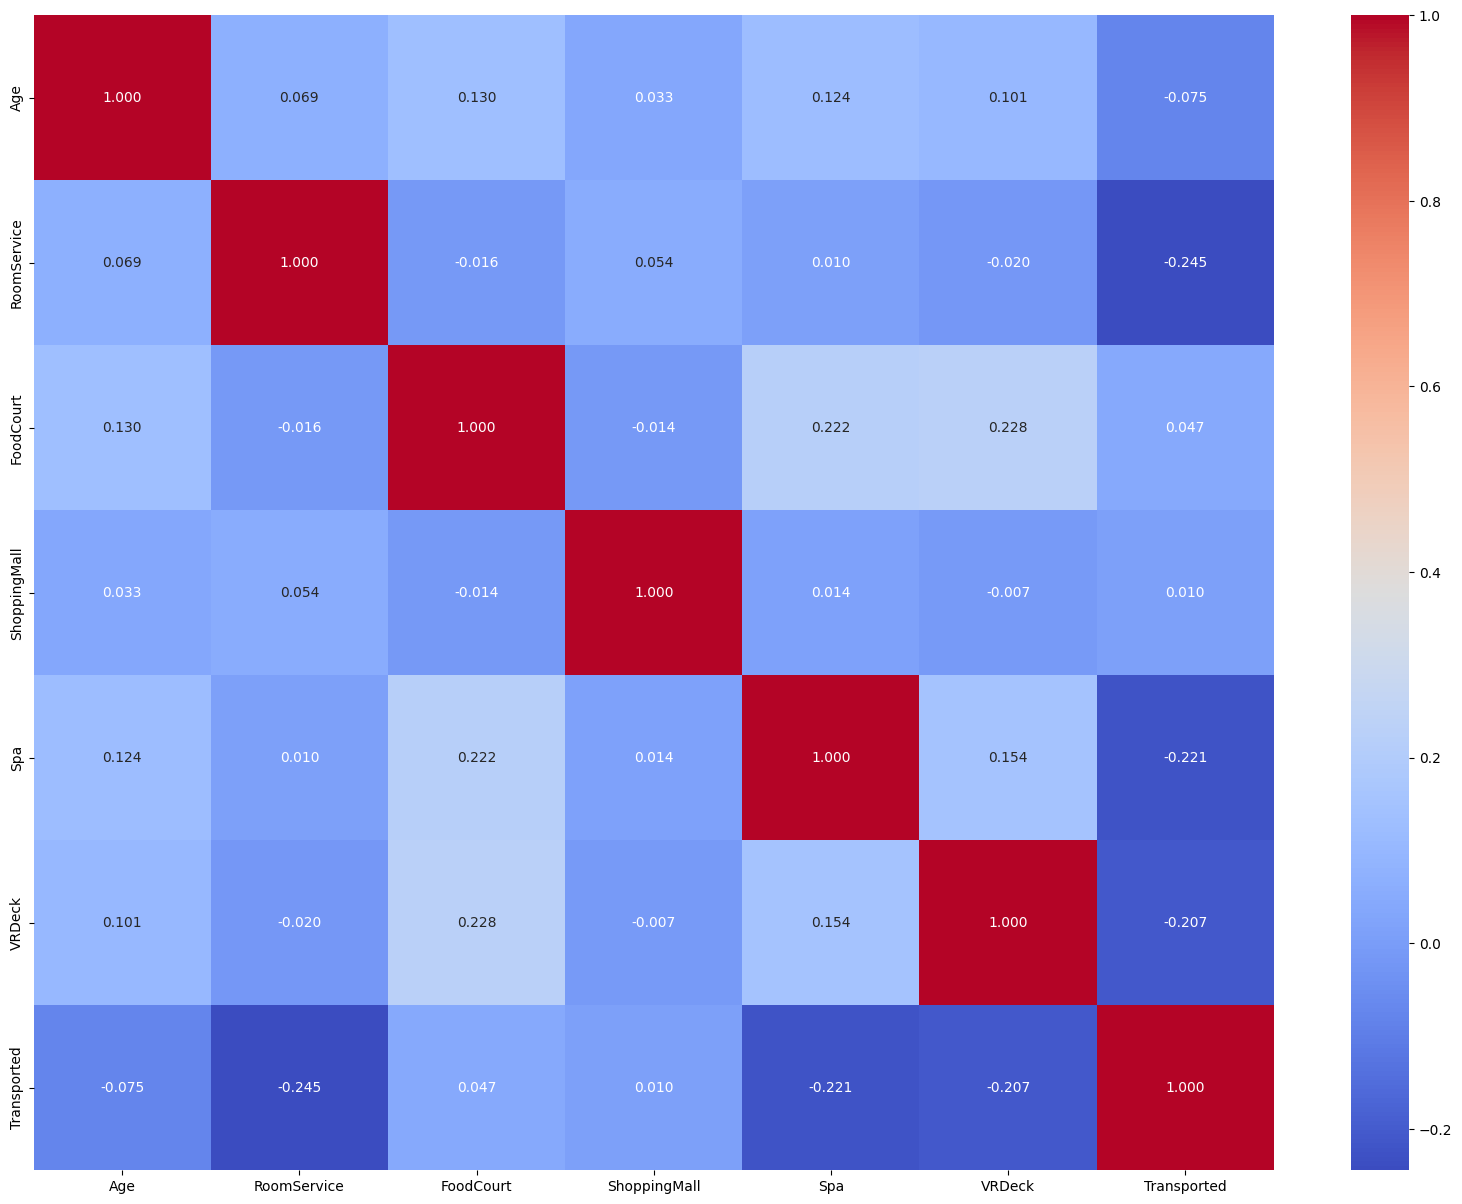

In [3]:
correlation_matrix = Train_df.corr(numeric_only=True)
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix,annot= True, cmap= 'coolwarm', fmt='0.3f')

In [4]:
sns.boxplot

<function seaborn.categorical.boxplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, dodge='auto', width=0.8, gap=0, whis=1.5, linecolor='auto', linewidth=None, fliersize=None, hue_norm=None, native_scale=False, log_scale=None, formatter=None, legend='auto', ax=None, **kwargs)>

In [5]:
#finding the missing values
pd.DataFrame(Train_df.isnull().sum(), columns=['Missing Values']).sort_values(by='Missing Values', ascending=False).head(20)

,Missing Values
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
Spa,183
FoodCourt,183
Destination,182


In [6]:
# Display columns with object data type
object_columns = Train_df.select_dtypes(include=['object']).columns
print(object_columns)


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')


In [7]:
Train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [8]:
Train_df['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [9]:
Train_df['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      shape=(6561,), dtype=object)

In [10]:
Train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [11]:
Train_df['VIP'].unique()

array([False, True, nan], dtype=object)

## Feature Engineering

In [12]:
Train_df['totalspend'] = Train_df['RoomService'] + Train_df['FoodCourt'] + Train_df['ShoppingMall'] + Train_df['Spa'] + Train_df['VRDeck']
Test_df['totalspend'] = Test_df['RoomService'] + Test_df['FoodCourt'] + Test_df['ShoppingMall'] + Test_df['Spa'] + Test_df['VRDeck']

## Filling Missing Values

In [13]:
#Home Planet
Train_df['HomePlanet']= Train_df['HomePlanet'].fillna('Unknown')
Test_df['HomePlanet']= Test_df['HomePlanet'].fillna('Unknown')


In [14]:
from sklearn.impute import SimpleImputer
# Imputing missing values with mode for categorical columns
cols = ['Destination','CryoSleep','VIP','HomePlanet']
imputer_mode = SimpleImputer(strategy='most_frequent')
Train_df[cols] = imputer_mode.fit_transform(Train_df[cols])
Test_df[cols] = imputer_mode.transform(Test_df[cols])

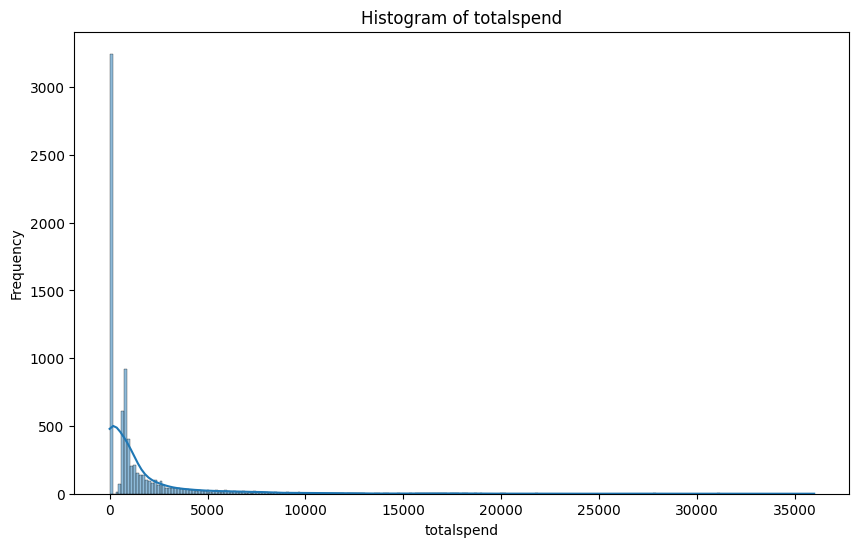

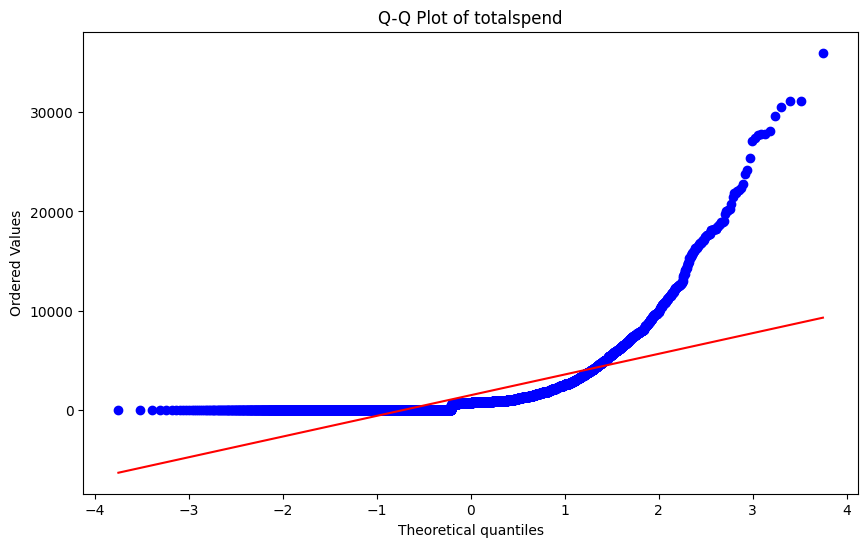

In [15]:
#For totalspend

import scipy.stats as stats

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Train_df['totalspend'].dropna(), kde=True)
plt.title('Histogram of totalspend')
plt.xlabel('totalspend')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(Train_df['totalspend'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of totalspend')
plt.show()

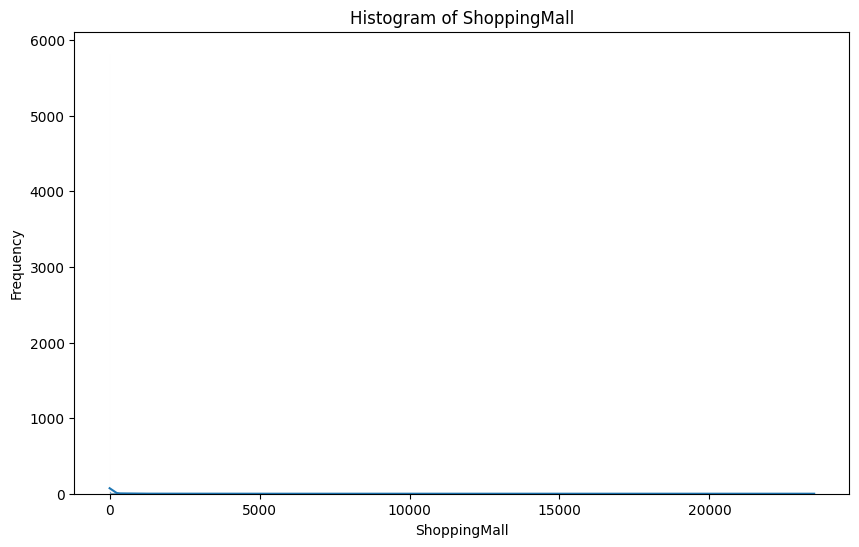

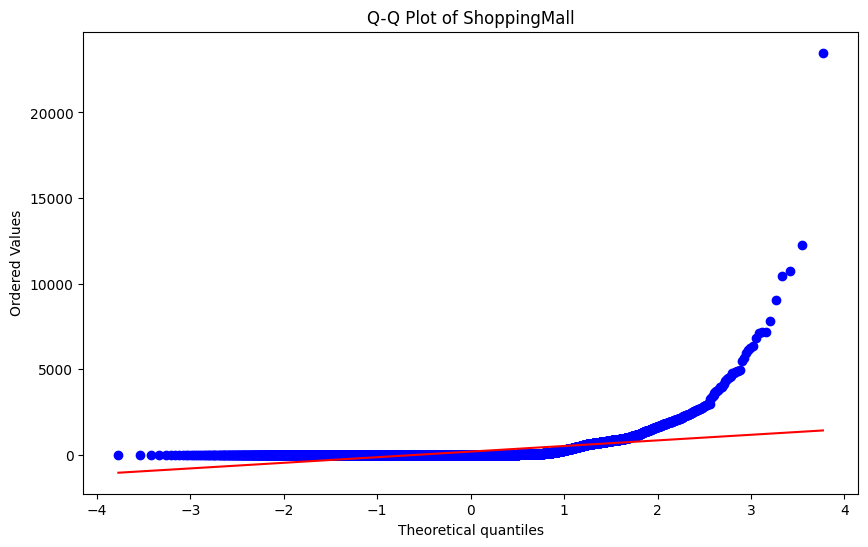

In [16]:
#For ShoppingMall

import scipy.stats as stats

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Train_df['ShoppingMall'].dropna(), kde=True)
plt.title('Histogram of ShoppingMall')
plt.xlabel('ShoppingMall')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(Train_df['ShoppingMall'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of ShoppingMall')
plt.show()

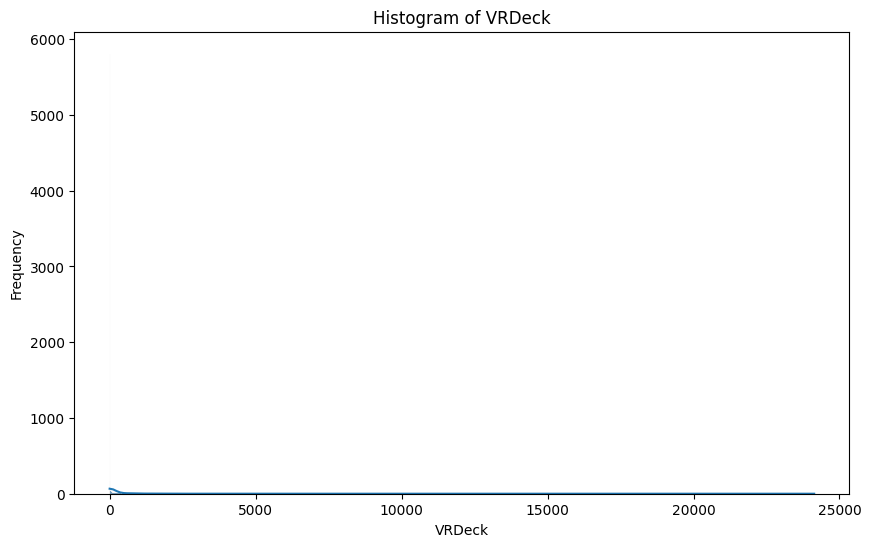

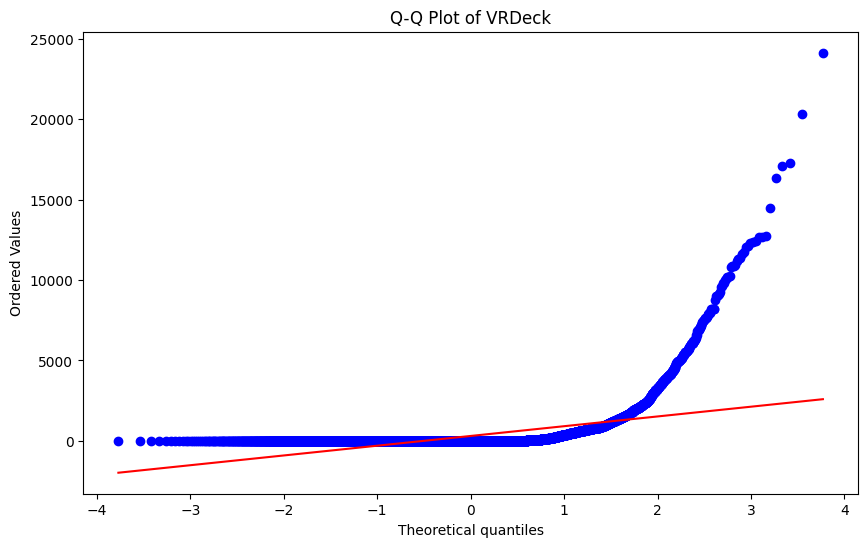

In [17]:
#For VRDeck

import scipy.stats as stats

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Train_df['VRDeck'].dropna(), kde=True)
plt.title('Histogram of VRDeck')
plt.xlabel('VRDeck')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(Train_df['VRDeck'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of VRDeck')
plt.show()

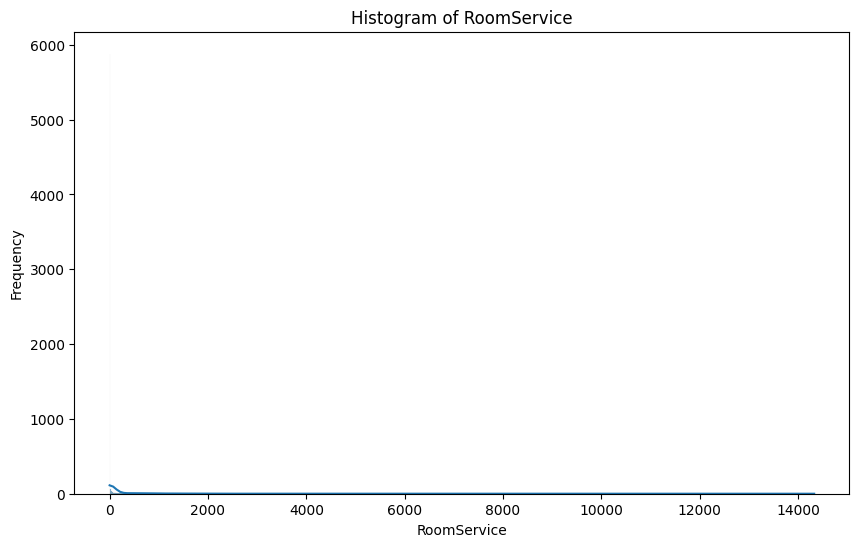

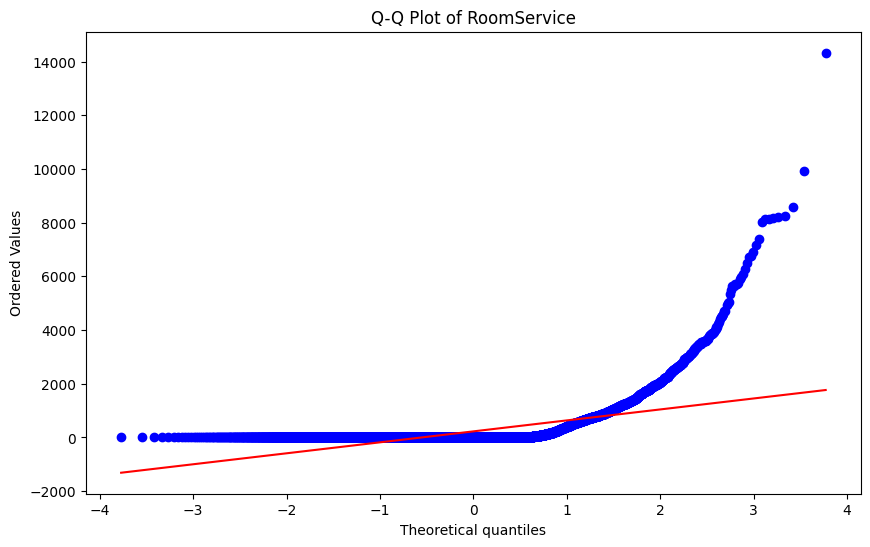

In [18]:
#For RoomService

import scipy.stats as stats

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Train_df['RoomService'].dropna(), kde=True)
plt.title('Histogram of RoomService')
plt.xlabel('RoomService')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(Train_df['RoomService'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of RoomService')
plt.show()

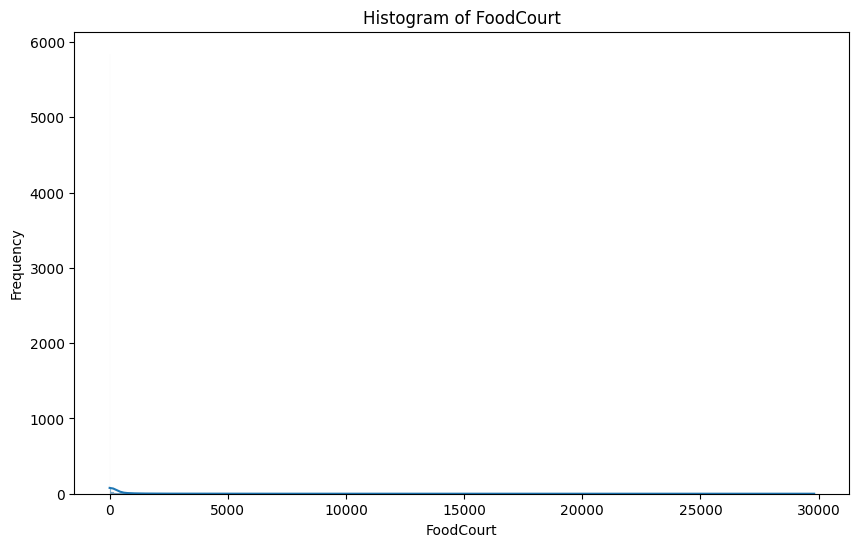

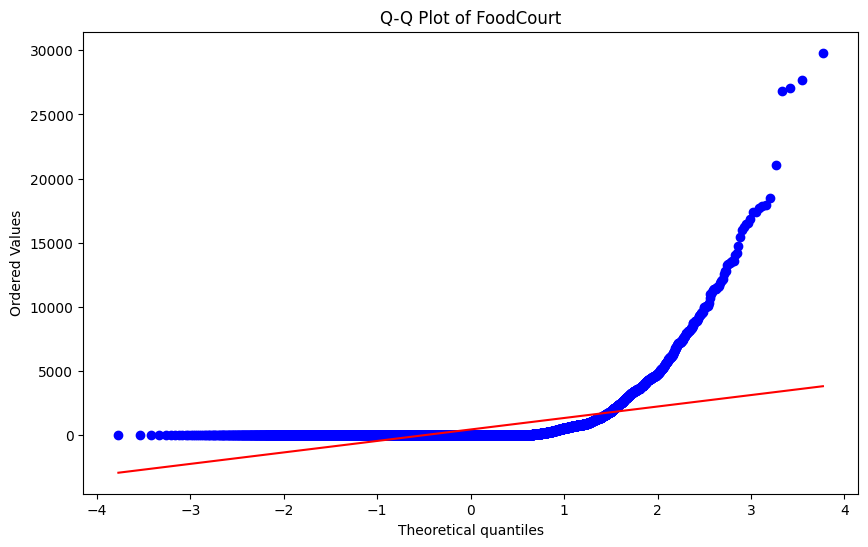

In [19]:
#For FoodCourt

import scipy.stats as stats

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Train_df['FoodCourt'].dropna(), kde=True)
plt.title('Histogram of FoodCourt')
plt.xlabel('FoodCourt')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(Train_df['FoodCourt'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of FoodCourt')
plt.show()

In [20]:
from sklearn.impute import SimpleImputer
# Imputing missing values with mode for categorical columns
cols = ['Destination','CryoSleep','VIP','HomePlanet']
imputer_mode = SimpleImputer(strategy='most_frequent')
Train_df[cols] = imputer_mode.fit_transform(Train_df[cols])
Test_df[cols] = imputer_mode.transform(Test_df[cols])

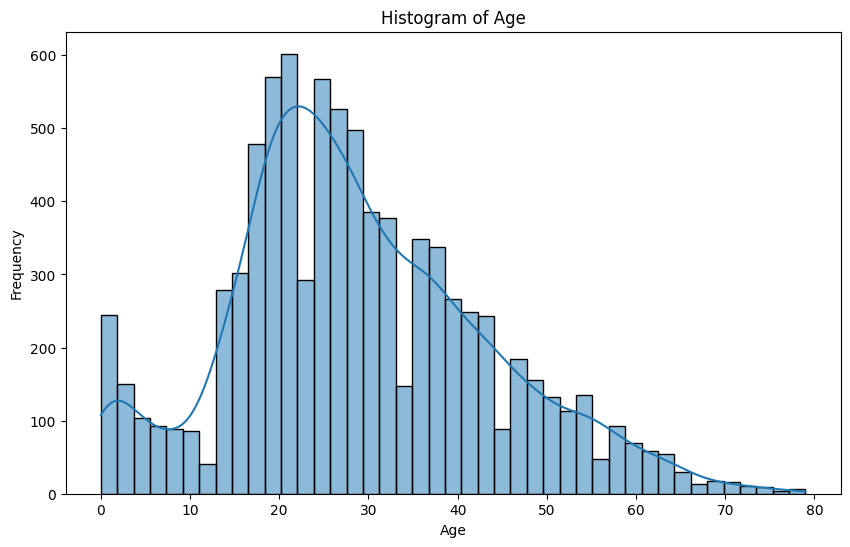

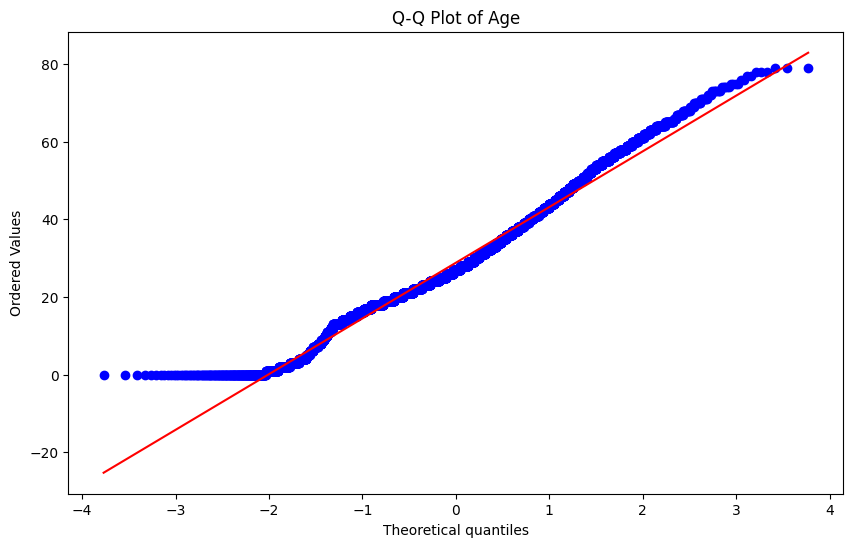

In [21]:
import scipy.stats as stats

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Train_df['Age'].dropna(), kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(Train_df['Age'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.show()

In [22]:
# Calculate the mean of 'Age' column in Train_df
Age_mean = Train_df['Age'].mean()

# Fill missing values in 'Age' with the mean value
Train_df['Age'].fillna(Age_mean, inplace=True)
Test_df['Age'].fillna(Age_mean, inplace=True)


C:\Users\hasin\AppData\Local\Temp\ipykernel_8560\4271633613.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Train_df['Age'].fillna(Age_mean, inplace=True)
C:\Users\hasin\AppData\Local\Temp\ipykernel_8560\4271633613.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [23]:
#Median for FoodCourt,RoomService, VRDeck, ShoppingMall, totalspend
from sklearn.impute import SimpleImputer
# List of columns to impute with median
median_cols = ['FoodCourt', 'RoomService', 'VRDeck', 'ShoppingMall', 'totalspend','Spa']

# Imputing missing values with median for the specified columns
imputer_median = SimpleImputer(strategy='median')
Train_df[median_cols] = imputer_median.fit_transform(Train_df[median_cols])
Test_df[median_cols] = imputer_median.transform(Test_df[median_cols])

# Verify that missing values are filled
print(Train_df[median_cols].isnull().sum())
print(Test_df[median_cols].isnull().sum())

FoodCourt       0
RoomService     0
VRDeck          0
ShoppingMall    0
totalspend      0
Spa             0
dtype: int64
FoodCourt       0
RoomService     0
VRDeck          0
ShoppingMall    0
totalspend      0
Spa             0
dtype: int64


In [24]:
#drop name,Id and cabin
Train_df.drop(['Name','Cabin','PassengerId'], axis=1, inplace=True)
Test_df.drop(['Name','Cabin',], axis=1, inplace=True)

In [25]:
#finding the missing values
pd.DataFrame(Train_df.isnull().sum(), columns=['Missing Values']).sort_values(by='Missing Values', ascending=False).head(20)

,Missing Values
HomePlanet,0
CryoSleep,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0
VRDeck,0


<Axes: >

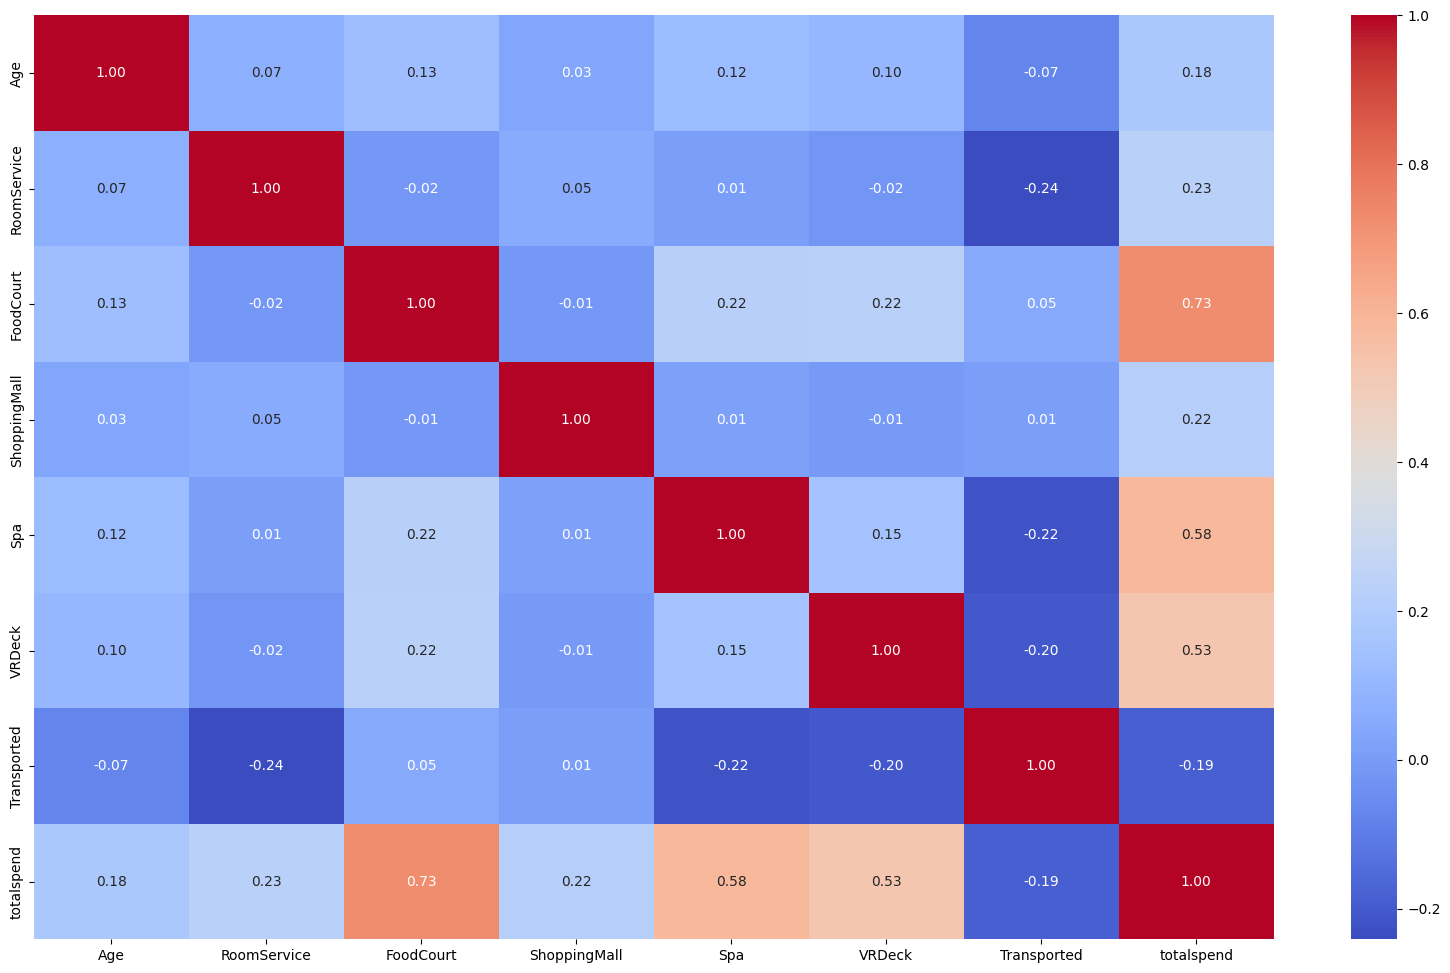

In [26]:
correlation_matrix = Train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot= True, cmap= 'coolwarm', fmt='0.2f')

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
## Featue Scaling to the numerical cols
num_cols =Train_df.select_dtypes(include=['int64','float64']).columns

# Scaling the numerical features
scaler = StandardScaler()
Train_df[num_cols] = scaler.fit_transform(Train_df[num_cols])
Test_df[num_cols] = scaler.transform(Test_df[num_cols])

## Encoding Categorical Data

In [28]:
from sklearn.preprocessing import OneHotEncoder
#Apply One-Hot Encoding
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
Train_ohe = one_hot_encoder.fit_transform(Train_df[cols])
Test_ohe = one_hot_encoder.transform(Test_df[cols])

# Convert the One-Hot Encoded columns to DataFrame
Train_ohe_df = pd.DataFrame(Train_ohe, columns=one_hot_encoder.get_feature_names_out(cols))
Test_ohe_df = pd.DataFrame(Test_ohe, columns=one_hot_encoder.get_feature_names_out(cols))

# Reset index to concatenate correctly
Train_df.reset_index(drop=True, inplace=True)
Test_df.reset_index(drop=True, inplace=True)
Train_ohe_df.reset_index(drop=True, inplace=True)
Test_ohe_df.reset_index(drop=True, inplace=True)

# Drop original one-hot encoded columns and concatenate the new one-hot encoded DataFrame
Train_df = pd.concat([Train_df.drop(columns=cols), Train_ohe_df], axis=1)
Test_df = pd.concat([Test_df.drop(columns=cols), Test_ohe_df], axis=1)


## Splitting the dataset into the Training set and Test set

In [29]:
X_train = Train_df.drop(columns=['Transported']).values
y_train = Train_df['Transported'].values
X_test = Test_df.drop(columns=['PassengerId']).values

## Training the KernelSVMClassification model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Prediciting

In [31]:
y_pred = classifier.predict(X_test)
print(y_pred)


h:\ML\Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "h:\ML\Project\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\hasin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hasin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1038, in __init__
    self._execute_child(args, executable, preexec_fn, cl

[False False  True ...  True  True  True]


## Creating CSV File

In [ ]:
# Create a DataFrame with IDs and predicted values
results_df = pd.DataFrame({
    'PassengerId': Test_df['PassengerId'],
    'Transported': y_pred
})

# Save the DataFrame to a CSV file
results_df.to_csv('predictions_KernelSVMClassification.csv', index=False)

print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv
